# Used cars price in Brazil - prediction model

## 📚 About the data

The dataset pertains to the average price of Brazilian used cars and contains information about fuel type, engine size, gear, brand, and model, as well as how these factors influence the final price. The database was generated by FIPE (Fundação Instituto de Pesquisas Econômicas), an institute that catalogs the average prices of used cars in the domestic market for use as a parameter in the car sales market.

The objective of the current study is to develop a model capable of predicting car prices based on input variables.

## 📓 Data dictionary

* `year_of_reference`: year of reference of the observation, i.e., the year the data corresponds to.
moth_of_reference: month of reference of the observation, i.e., the month the data corresponds to. The average price is calculated by FIPE each month.
* `fipe_code`: unique id corresponding to a model for easy search on FIPE webpage.
* `authentication`: unique code that authenticates the consult in FIPE's site.
* `brand`: car's make.
* `model`: a description of the car containing the name and other descriptive information, as provided in FIPE table.
* `fuel`: fuel used by the car. Some of gas cars are actually alcohol and gas (totalflex), which is common in Brazil.
* `gear`: the way gears are shifted.
* `engine_size`: Engine size measured in cubic centimeters.
* `year_model`: those values corresponds to the year of reference, and may not be the same of the year of manufacture, which in case will corresponds to a year before year_model. Observations with year_model = year_of_reference mean the car is brand new for that year of reference, i.e., a 2021 car with year_of_reference = 2021 and moth_of_reference = July mean that the observation (mainly the average price) corresponds to a brand new car in the year of 2021, of the month of July. The same model may have a different average price for different month.
* `avg_price_brl`: average car's price, as measured by FIPE, in BRL.

## 💻 Importing libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings("ignore")
%matplotlib inline

## ⬇️ Loading the data

In [29]:
df = pd.read_csv("fipe_2022.csv") # load the file bank_marketing.csv

- First look at the data
- Look to the data types
- Look for unique values
- Look for missing values

In [30]:
# let us have a first look at the first rows of the dataset
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


In [31]:
# let us have a first look at the last rows of the dataset
df.tail()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
290270,2022,December,061001-1,lzrp3rpklh8q,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2009,22894.0,14
290271,2022,December,061001-1,lrfw427w9v5h,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2008,22270.0,15
290272,2022,December,061001-1,lh98rfxnhy18,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2007,21663.0,16
290273,2022,December,061001-1,k9dtwsps5sy1,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2006,21073.0,17
290274,2022,December,061001-1,j7gt9020nqvt,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2005,18264.0,18


In [32]:
# Let us have a look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   290275 non-null  int64  
 1   month_of_reference  290275 non-null  object 
 2   fipe_code           290275 non-null  object 
 3   authentication      290275 non-null  object 
 4   brand               290275 non-null  object 
 5   model               290275 non-null  object 
 6   fuel                290275 non-null  object 
 7   gear                290275 non-null  object 
 8   engine_size         290275 non-null  float64
 9   year_model          290275 non-null  int64  
 10  avg_price_brl       290275 non-null  float64
 11  age_years           290275 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 26.6+ MB


In [33]:
# Let us have a look at the null values
df.isnull().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
age_years             0
dtype: int64

In [34]:
# Let us have a look at the numerical values
df.describe()

,year_of_reference,engine_size,year_model,avg_price_brl,age_years
count,290275.0,290275.000000,290275.000000,2.902750e+05,290275.000000
mean,2022.0,2.266047,2008.896633,1.220872e+05,14.103367
std,0.0,1.033109,9.263619,3.219139e+05,9.263619
min,2022.0,0.700000,1985.000000,1.831000e+03,0.000000
25%,2022.0,1.600000,2001.000000,2.187500e+04,7.000000
50%,2022.0,2.000000,2010.000000,4.683600e+04,13.000000
75%,2022.0,2.800000,2016.000000,1.061650e+05,22.000000
max,2022.0,6.700000,2023.000000,8.600000e+06,38.000000


In [35]:
# Let us have a look at the unique values for object data type columns

cat_columns = df.describe(include=["object"]).columns

for i in cat_columns:
    if i in df.columns:
        print("Unique values in", i, "are:")
        print(df[i].value_counts())
        print("*" * 50)

Unique values in month_of_reference are:
November     24366
December     24364
October      24333
September    24324
August       24226
March        24168
July         24165
June         24123
February     24094
May          24057
January      24031
April        24024
Name: month_of_reference, dtype: int64
**************************************************
Unique values in fipe_code are:
039001-1    443
067001-4    423
040002-5    386
035014-1    292
027024-5    282
           ... 
011223-2      6
011222-4      6
093011-3      6
009300-9      6
005536-0      6
Name: fipe_code, Length: 5903, dtype: int64
**************************************************
Unique values in authentication are:
3r6c277cnqcb    2
gb76cyvp29j4    2
ppv7j6pl3x18    1
1jhkd84t7dp     1
5mq87l1jgwfx    1
               ..
lwgkvql9dwc     1
ktmvpl337yc     1
jj67fc0pdjc     1
qjplns796tp     1
j7gt9020nqvt    1
Name: authentication, Length: 290273, dtype: int64
**************************************************
U

### Observations

* There is no null values in the dataset.
* It appears that the column `authentication` is part of FIPE's unique authentication number and is not relevant to the study's purpose. Therefore, it will be excluded from the analysis since it does not have any relationship to the study's objectives.
* Similarly, the `fipe_code` can be excluded from the dataset as this will not contribute to the target variable.
* `age_years` and `year_model` contains basically the same information, but in different format, which can cause high correlation between them. One of them can be dropped from the dataset.
* `year_of_reference` is just the year the data was collected and will not impact on the target variable. It can be dropped as well.
* The `model` feature contains the same information of `engine_size` and `fuel_type`. Other information such as model name will not affect the `avg_price_brl` target variable.

## 🧹Data cleaning

* Excluding `authentication`, `fipe_code` and `year_model`:

In [36]:
df.drop(['authentication','fipe_code','year_model','year_of_reference','model'], axis=1, inplace=True)
df.head()

,month_of_reference,brand,fuel,gear,engine_size,avg_price_brl,age_years
0,January,Acura,Gasoline,manual,3.0,43779.0,28
1,January,Acura,Gasoline,manual,3.0,42244.0,29
2,January,Acura,Gasoline,manual,3.0,40841.0,30
3,January,Acura,Gasoline,manual,3.0,39028.0,31
4,January,Acura,Gasoline,manual,3.0,35678.0,32


## 📈 Exploratory Data Analysis

* Let us start plotting the histograms for numerical variables to understand our data.

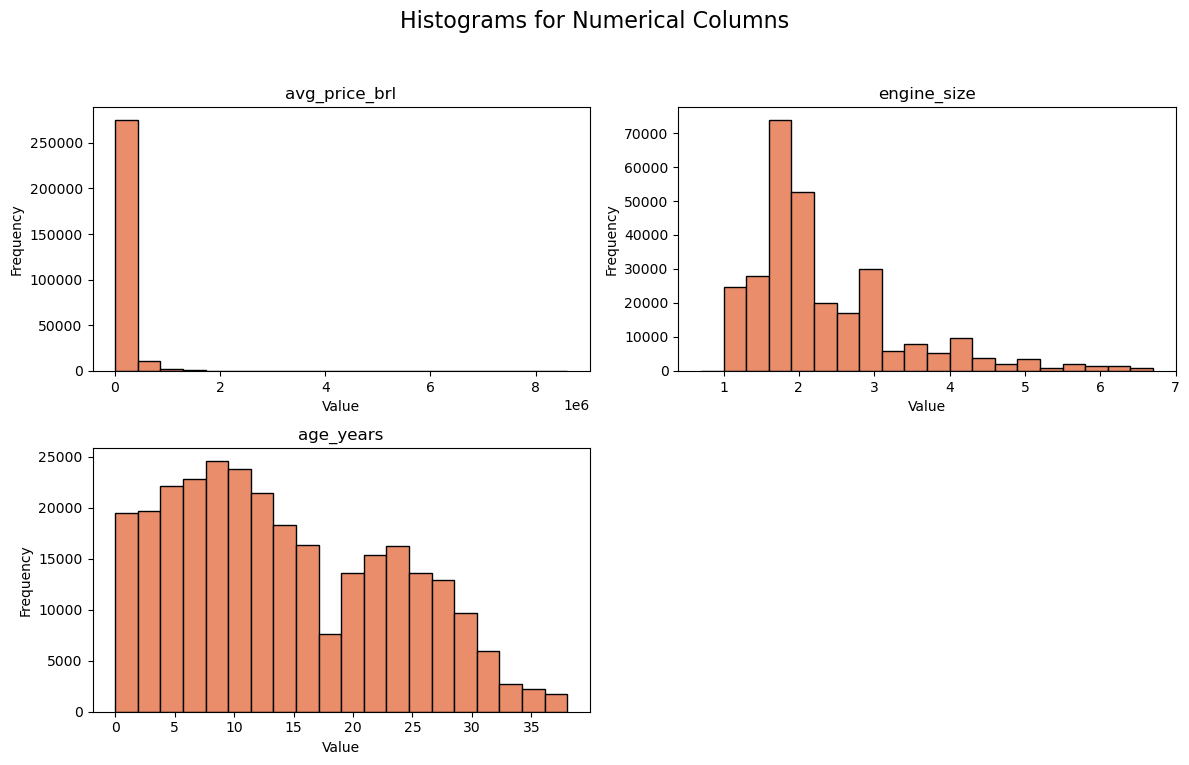

In [37]:
# Setting the color pallette
flare_palette = sns.color_palette("flare")
sns.set_palette(flare_palette)

# Select the numerical columns for the histograms
numerical_columns = ['avg_price_brl','engine_size', 'age_years']

# Set up the size of the plot grid based on the number of numerical columns
num_rows = (len(numerical_columns) - 1) // 2 + 1
num_cols = min(len(numerical_columns), 2)

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Histograms for Numerical Columns', fontsize=16)

# Flatten the axs array if there's only one row
if num_rows == 1:
    axs = [axs]

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    row_index = i // num_cols
    col_index = i % num_cols
    axs[row_index][col_index].hist(df[col], bins=20, edgecolor='black')
    axs[row_index][col_index].set_title(col)
    axs[row_index][col_index].set_xlabel('Value')
    axs[row_index][col_index].set_ylabel('Frequency')

# Remove any empty subplots
if len(numerical_columns) < num_rows * num_cols:
    for i in range(len(numerical_columns), num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

* Let us perform a log transformation in the target variable `avg_price_brl`

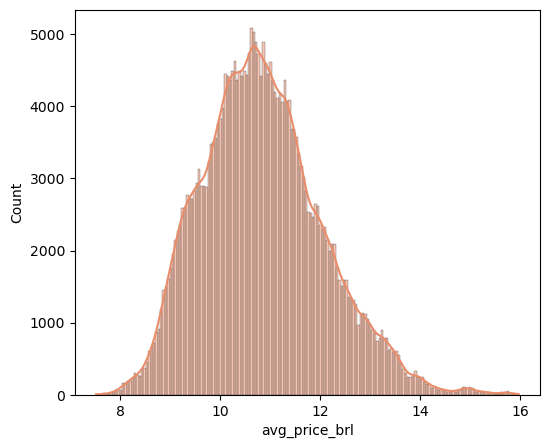

In [38]:
plt.figure(figsize= (6, 5))
sns.histplot(np.log(df['avg_price_brl']), kde= True)
plt.show()

In [40]:
df['log_price'] = np.log(df['avg_price_brl'])

### Observations

* The target variable `avg_price_brl` is heavily right-tail skewed. We applied a log transformation to approximate it to a Normal distribution.

## Bivariate analysis

**Car average price vs Age years**

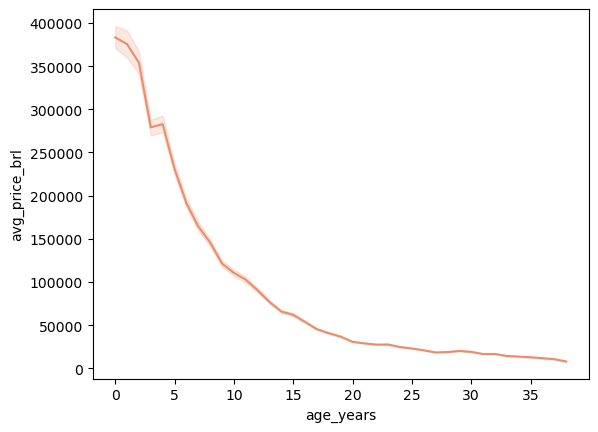

In [42]:
sns.lineplot(x='age_years', y="avg_price_brl", data=df)
plt.show()

**Car average price vs Engine size**

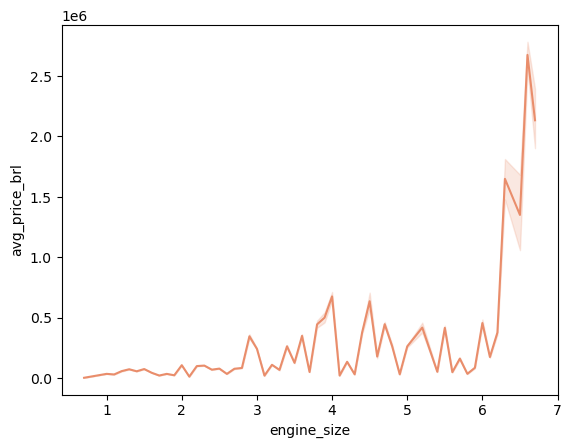

In [43]:
sns.lineplot(x='engine_size', y="avg_price_brl", data=df)
plt.show()

**Car average price vs Fuel type**

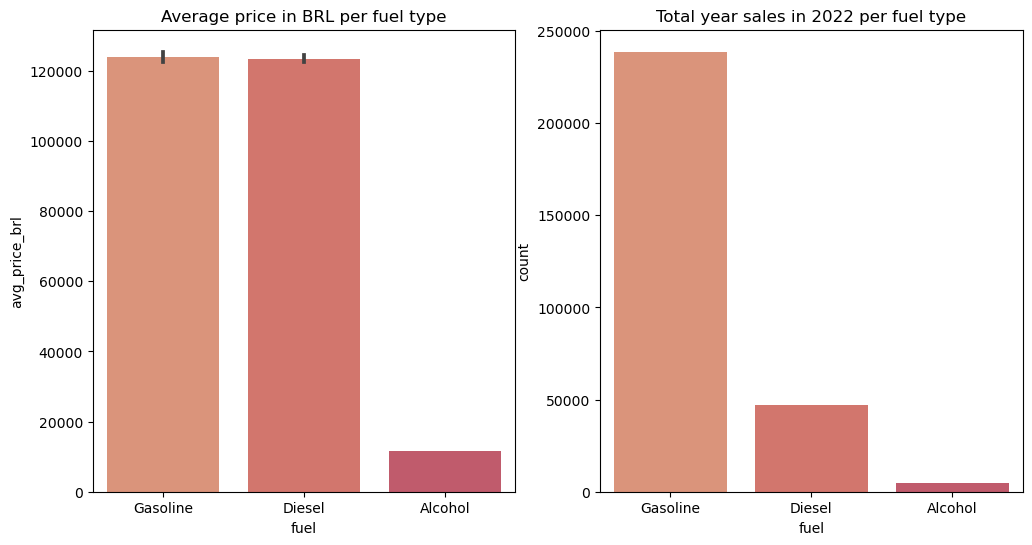

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plot1 = sns.barplot(x='fuel', y="avg_price_brl", data=df, ax=ax[0])
plot2 = sns.countplot(x='fuel', data=df, ax=ax[1])

ax[0].set_title('Average price in BRL per fuel type')
ax[1].set_title('Total year sales in 2022 per fuel type')

plt.show()

**Car average price vs Brand**

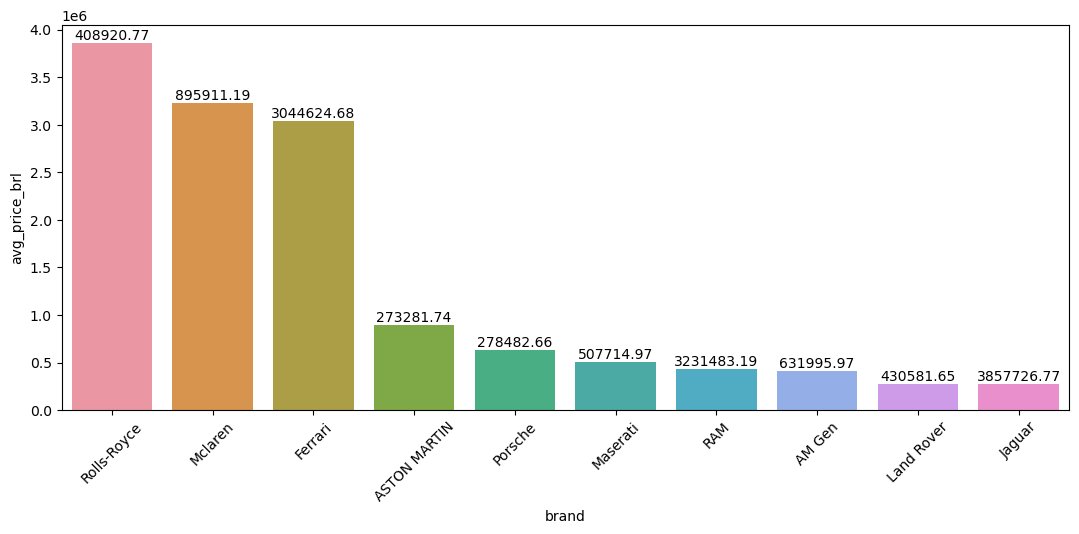

In [45]:
# Group and aggregate the data to get the average price for each brand
brand_avg_prices = df.groupby('brand')['avg_price_brl'].mean().reset_index()

# Sort the data based on average price in descending order and select the top 10 brands
top_10_brands = brand_avg_prices.nlargest(10, 'avg_price_brl')

plt.figure(figsize=(13, 5))
sns.barplot(x='brand', y="avg_price_brl", data=top_10_brands)
abs_values = top_10_brands.groupby('brand')['avg_price_brl'].mean().round(2)
plt.bar_label(plt.gca().containers[0], labels=abs_values, label_type='edge')
plt.xticks(rotation=45)
plt.show()

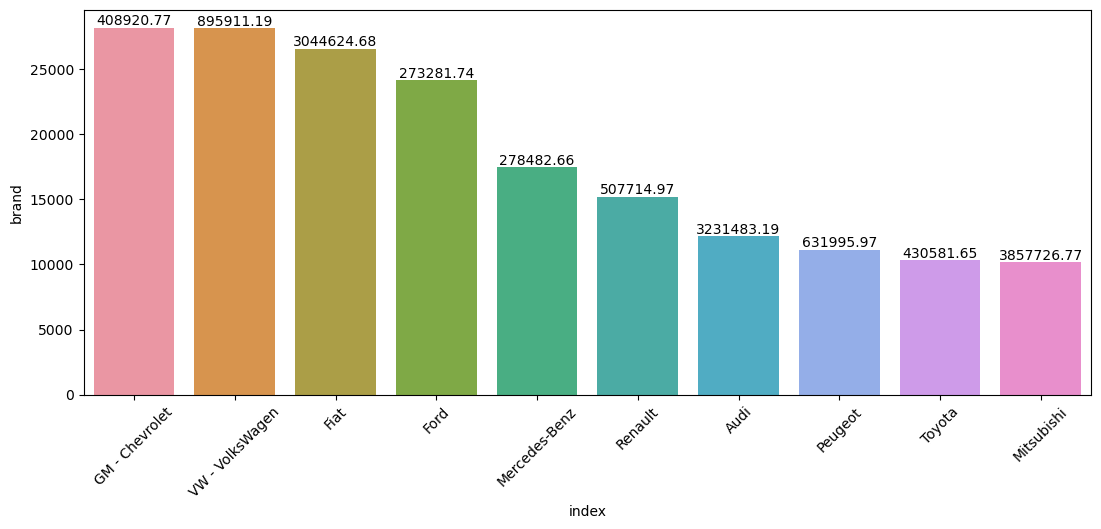

In [46]:
plt.figure(figsize=(13, 5))
sns.barplot(x='index', y="brand", data=df['brand'].value_counts().reset_index().head(10))
plt.bar_label(plt.gca().containers[0], labels=abs_values, label_type='edge')
plt.xticks(rotation=45)
plt.show()

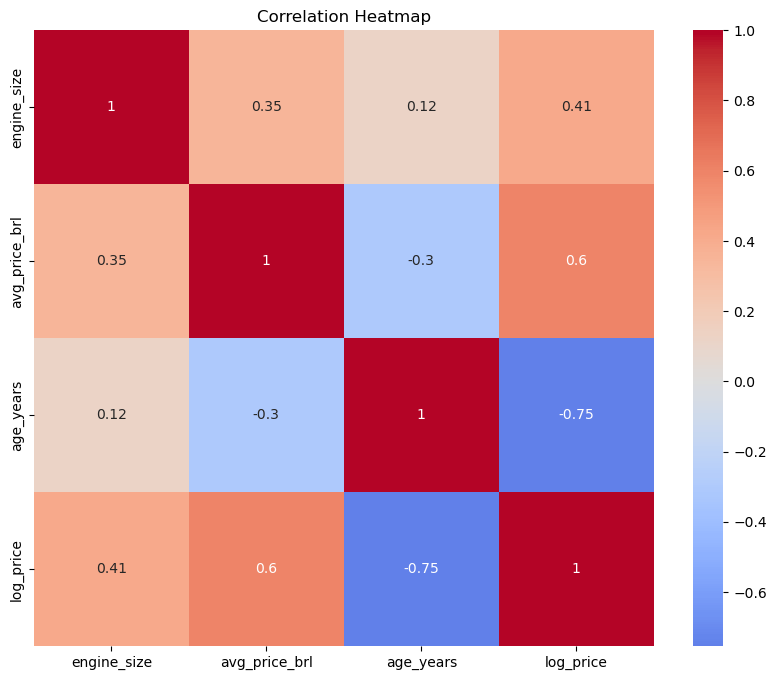

In [47]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)

# Add title
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

## 🧠 Building the model

In [48]:
# Dropping the avg_price_brl
df.drop(['avg_price_brl'], axis=1, inplace=True)

In [56]:
def classification_funct(dataset,column_to_be_studied):
    #importing Classification libraries
    from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge
    from sklearn.ensemble import RandomForestRegressor
    from xgboost import XGBRegressor 

    # Drop rows with missing values in the column of interest
    dataset = dataset.dropna(subset=[column_to_be_studied])

    # Separate features and target variable
    x = dataset.drop(column_to_be_studied, axis=1)
    y = dataset[[column_to_be_studied]]    

    # One-hot encoding for categorical features using Pandas get_dummies
    categorical_features = x.select_dtypes(include=['object']).columns
    X = pd.get_dummies(x, columns=categorical_features, drop_first=True)

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)
    
    Lin=LinearRegression()
    BayesRidge=BayesianRidge()
    R=RandomForestRegressor()    
    Ridge=Ridge() 
    XGBR=XGBRegressor()
    
    algos=[Lin,BayesRidge,R,Ridge,XGBR]
    algo_names=['Linear Regression','Bayesian Ridge','Random Forest','Ridge','XGBoost']
    mse=[]
    rmse=[]
    r2_scores = []
    
    for item in tqdm(algos):
        item.fit(X_train, y_train)
        y_pred = item.predict(X_test)
        mse.append(mean_squared_error(y_test, y_pred))
        rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        r2_scores.append(r2_score(y_test, y_pred))

    # create dataframe with results
    result=pd.DataFrame(columns=['MSE','RMSE','R2_score'],index=algo_names)
    result['MSE']=mse
    result['RMSE']=rmse
    result['R2_score'] = r2_scores
    return result.sort_values('R2_score',ascending=False)

In [57]:
classification_funct(df,'log_price')

  0%|          | 0/5 [00:00<?, ?it/s]

,MSE,RMSE,R2_score
XGBoost,0.047391,0.217694,0.967407
Random Forest,0.048923,0.221185,0.966353
Linear Regression,0.106214,0.325905,0.926951
Bayesian Ridge,0.106214,0.325905,0.926951
Ridge,0.106320,0.326068,0.926878
